<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.1 
# *Data Wrangling and Munging with Pandas*

## Part 1: Wrangling Data

The term "data wrangling" is analogous to capturing wild horses and getting them into a fenced area; the horses are data and the fencing is your computer. The more common data wrangling tasks include:

- reading flat files
- reading Excel files
- downloading from web pages
  - csv
  - html
  - json

In [8]:
import numpy as np
import pandas as pd

*It is good practice to display the library version numbers for future reference:*

In [2]:
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

Numpy:  1.23.4
Pandas:  1.4.4


### CSV Files

Below are three attempts to load the file "bikeshare.csv" into a DataFrame named `bikes`. Why are they wrong?

In [3]:
# wrong:
bikes = pd.read_table('../../DATA/bikeshare.csv', header = None)
print(bikes.head())
print()

# wrong:
bikes = pd.read_table('../../DATA/bikeshare.csv', header = 1)
print(bikes.head())
print()

# wrong:
bikes = pd.read_table('../../DATA/bikeshare.csv', header = 0)
print(bikes.head())

                                                   0
0  instant,dteday,season,yr,mnth,hr,holiday,weekd...
1  1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,...
2  2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0...
3  3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0...
4  4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,...

  1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
0  2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0...     
1  3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0...     
2  4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,...     
3  5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,...     
4  6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,...     

  instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0  1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,...                                                                   
1  2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0...                                        

In [5]:
bikes = pd.read_csv('../../DATA/bikeshare.csv', header = 0, sep = ',')

In [6]:
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

?:
ANSWER: Case 1 treats headings as just another data row. Case 2 treats the 1st data row as the column header. Case 3 gets the header right (row 0), but reads each row as a single column (Nb. the other two make that same mistake). 

Load the file "bikeshare.csv" into a DataFrame named `bikes`, and confirm that it was loaded properly:

In [ ]:
#ANSWER:


Note that we could have used `read.csv()` above. When is `read_table()` necessary?

?:
ANSWER: When `sep` is not the comma character, or we need fine control that `read.csv()` does not provide.

Flat files can be full of surprises. Here are some issues to watch out for:

- separator character is something other than the comma
  - ";", "|", and tab are popular
- newline character is something other than what the O/S expects 
  - Tip: Don't hard-code the character codes for carriage returns, linefeeds, etc. Use Python's built-in representation instead (e.g. Python translates "\n" to the newline character and "\t" to the tab character on any O/S).
- truncated lines
  - if there are empty fields at the end of a line it is possible that their separators will be missing, resulting in a "jagged" file
- embedded commas or quotes
  - a free-text field containing embedded commas may split into separate fields on input
  - a free-text field containing embedded quotes may not parse correctly
- unescaped characters
  - the "\" character indicates a control code to Python, which will break the I/O
    - e.g. the substring "\u0123" will be interpreted as Unicode(0123) -- which may not be what the file creator intended
  - these may need to be fixed by loading whole strings and then parsing into a new data frame
  
Tip: Most issues can be delth with by correctly specifying the parameters of the function you use to load the file. Read the doco before reading the data!

### Reading Excel Files

In [12]:
from pandas import ExcelFile  # Nb. Need to install xlrd from conda (it does not automatically install with pandas)

In [11]:
df = pd.read_excel('../../DATA/Iris.xls', sheet_name = 'Data', header = 0, usecols = [0, 1, 2])
df

,Species_No,Petal_width,Petal_length
0,1,0.2,1.4
1,1,0.2,1.4
2,1,0.2,1.3
3,1,0.2,1.5
4,1,0.2,1.4
...,...,...,...
145,3,2.3,5.2
146,3,1.9,5.0
147,3,2.0,5.2
148,3,2.3,5.4


So, this file appears to have an embedded table of aggregates on the same sheet as the raw data (a naughty but common practice amongst analysts).

It is usually better to load data correctly than to meddle with the source file or load it 'warts and all' and then try to parse it in code. The Pandas functions for reading files have parameters that provide the control we need. For ecxample, we could make multiple calls to `read_excel()`, using combinations of the `header`, `usecols`, `skiprows`, `nrows`, and `skipfooter` parameters to load one table at a time from a spreadsheet with multiple tables.

Load the above file without the unwanted columns:

In [ ]:
#ANSWER


### Importing Data Directly from the Web

We usually want to store a local copy of a data file that we download from the Web, but when data retention is not a priority it is convenient to download the data directly into our running Python environment.

#### Importing Text Files from the Web

The web is the 'wild west' of data formats. However, we can usually expect good behaviour from files that are automatically generated by a service, such as the earthquake report:

In [11]:
df = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_hour.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-11-17T08:25:30.250Z,19.231333,-155.394669,31.540001,2.71,md,24,160,NaN,0.11,...,2022-11-17T08:28:49.320Z,"Island of Hawaii, Hawaii",earthquake,0.76,0.79,1.35,3,automatic,hv,hv


#### Importing HTML Files from the Web

Working with unstructured HTML files relies heavily on library functions. This one, however, is well-structured:

In [13]:
url = 'https://www.ccra.com/airport-codes/'

df = pd.read_html(url)
df

[                City      Country Code
 0            Aalborg      Denmark  AAL
 1           Aalesund       Norway  AES
 2             Aarhus      Denmark  AAR
 3     Abbotsford, BC       Canada  YXX
 4     Abbotsford, BC       Canada  YXX
 ...              ...          ...  ...
 1574        Zanzibar     Tanzania  ZNZ
 1575        Zaragoza        Spain  ZAZ
 1576       Zhengzhou        China  CGO
 1577        Zhoushan        China  HSN
 1578          Zurich  Switzerland  ZRH
 
 [1579 rows x 3 columns]]

In [16]:
df[0]

,City,Country,Code
0,Aalborg,Denmark,AAL
1,Aalesund,Norway,AES
2,Aarhus,Denmark,AAR
3,"Abbotsford, BC",Canada,YXX
4,"Abbotsford, BC",Canada,YXX
...,...,...,...
1574,Zanzibar,Tanzania,ZNZ
1575,Zaragoza,Spain,ZAZ
1576,Zhengzhou,China,CGO
1577,Zhoushan,China,HSN


#### Importing XML Files from the Web

XML files are semi-structured, but you're at the mercy of the file creator. If every record has the same format it will be much easier, but practical applications often require a lot of custom code. Here is an example that includes a nice parser class: http://www.austintaylor.io/lxml/python/pandas/xml/dataframe/2016/07/08/convert-xml-to-pandas-dataframe/

#### Importing JSON Files from the Web

Like XML, JSON files are semi-structured and may require work to capture the schema into a dataframe. Here is a simple example: 

In [14]:
url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/data.json'

# Load the first sheet of the JSON file into a data frame
df = pd.read_json(url, orient = 'columns')
df.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


## Part 2: Data Munging

Data munging is manipulating data to get it into a form that we can start running analyses on (which usually means getting the data into a DataFrame). Before we get to this stage, we may need to remove headers or footers, transpose columns to rows, split wide data tables into long ones, and so on. (Nb. Excel files can be particularly troublesome, because users can format their data in mixed, complex shapes.) Essentially, we need to follow Hadley Wickham's guidelines for tidy datasets (http://vita.had.co.nz/papers/tidy-data.html):

The end goal of the cleaning data process:

- each variable should be in one column
- each observation should comprise one row
- each type of observational unit should form one table
- include key columns for linking multiple tables
- the top row contains (sensible) variable names
- in general, save data as one file per table


### Dataset Morphology

Once we have our dataset in a DataFrame (or Series, if our data is only 1-dimensional), we can start examining its size and content.

How many rows and columns are in `bikes`?

In [17]:
#ANSWER
bikes.shape

(17380, 1)

What are the column names in `bikes`?

In [27]:
#ANSWER
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

What are the data types of these columns?

In [28]:
#ANSWER
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

What is the (row) index for this DataFrame?

In [17]:
#ANSWER
bikes.index

RangeIndex(start=0, stop=17379, step=1)

https://www.dataquest.io/blog/python-json-tutorial/

## Slicing and Dicing

It is often preferable to refer to DataFrame columns by name, but there is more than one way to do this. 
Do `bikes['season']` and `bikes[['season']]` give the same object? Demonstrate:

In [29]:
bikes['season']

0        1
1        1
2        1
3        1
4        1
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: season, Length: 17379, dtype: int64

In [30]:
bikes[['season']]

,season
0,1
1,1
2,1
3,1
4,1
...,...
17374,1
17375,1
17376,1
17377,1


How would we use object notation to show the first 4 rows of `atemp`?

In [18]:
#ANSWER
bikes.atemp[:4]

0    0.2879
1    0.2727
2    0.2727
3    0.2879
Name: atemp, dtype: float64

Algorithms that loop over multiple columns often access DataFrame columns by index. However, none of the following work (try them out by uncommenting / removing the "#E: " ): 

In [19]:
bikes[[0]]
#E: bikes[0]
#E: bikes[0,0]
#E: bikes[[0,0]]

KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

What is the correct way to access the 1st row of the DataFrame by its index?

In [20]:
#ANSWER
bikes.iloc[:1]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [21]:
bikes.iloc[:,1:5]

,dteday,season,yr,mnth
0,2011-01-01,1,0,1
1,2011-01-01,1,0,1
2,2011-01-01,1,0,1
3,2011-01-01,1,0,1
4,2011-01-01,1,0,1
...,...,...,...,...
17374,2012-12-31,1,1,12
17375,2012-12-31,1,1,12
17376,2012-12-31,1,1,12
17377,2012-12-31,1,1,12


What is the correct way to access the 2nd column of the DataFrame by its index?

In [22]:
#ANSWER
bikes.iloc[:,1:2]

,dteday
0,2011-01-01
1,2011-01-01
2,2011-01-01
3,2011-01-01
4,2011-01-01
...,...
17374,2012-12-31
17375,2012-12-31
17376,2012-12-31
17377,2012-12-31


In [23]:
bikes[['dteday']]

,dteday
0,2011-01-01
1,2011-01-01
2,2011-01-01
3,2011-01-01
4,2011-01-01
...,...
17374,2012-12-31
17375,2012-12-31
17376,2012-12-31
17377,2012-12-31


## Handling Missing Values

What is the Pandas `isnull` function for? 

?
ANSWER:

We can apply `isnull` to the `bikes` DataFrame to show the result for every element:

In [43]:
bikes.isnull().head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [45]:
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


However, we usually start at a higher level. How many nulls are in `bikes` altogether?

In [25]:
#ANSWER
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

If this result were nonzero we would next want to find out which columns contained nulls. How can this be done in one line of code?

What is the Numpy object `nan` used for? (Write a descriptive answer.)

#ANSWER: Marking a data point as invalid.

Write (and verify) a function that performs scalar division with built-in handling of the edge case (i.e. return a value instead of just trapping the error):

In [26]:
#ANSWER
def divide(dividend, divisor):
    if divisor == 0:
        quotient = np.nan
    else:
        quotient = dividend / divisor
    return (quotient)

print(divide(1, 0))

nan


In [47]:
array = np.array([[1,np.nan,3], [4,5,np.nan]])
print(array)

[[ 1. nan  3.]
 [ 4.  5. nan]]


In [48]:
#ANSWER
print(pd.isna(array))

[[False  True False]
 [False False  True]]


Apply the Pandas `isna` function to the following data objects:

In [27]:
x = 2.3
y = np.nan
print(x, y)

2.3 nan


In [28]:
#ANSWER
print(pd.isna(x), pd.isna(y))

False True


In [ ]:
array = np.array([[1, np.nan, 3], [4, 5, np.nan]])
print(array)

How is the pandas I/O parameter `na_values` used?

ANSWER: to convert special strings to nan (for example "?", "N/A")

## Data Profiling

### Counts

When there are categorical variables in a dataset we will want to know how many possible values there are in each column. (Nb. If the dataset is a sample of a larger one, our sample may not capture all possible values of every categorical.)

How many (different) seasons are in `bikes`?

In [30]:
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [56]:
bikes.dteday.nunique()

731

In [49]:
bikes['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

### Ranges

Print the range of the `instant`, `dteday`, and `windspeed` columns: 

In [50]:
bikes['instant'].min()

1

In [31]:
bikes['instant'].max()

17379

In [51]:
bikes['dteday'].min()

'2011-01-01'

In [32]:
bikes['dteday'].max()

'2012-12-31'

In [33]:
bikes['windspeed'].min()

0.0

In [34]:
bikes['windspeed'].max()

0.8507

Compute and print the overall minimum and maximum of the numeric data columns:

In [36]:
bikes_min, bikes_max = (min(bikes.min(numeric_only=True)), 
                        max(bikes.max(numeric_only=True)))
bikes_min, bikes_max

(0.0, 17379.0)

### Quantiles

Pandas makes computing quantiles easy. This is how to get the median of a Series:

In [58]:
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [60]:
bikes['atemp'].quantile(0.5)

0.4848

Of course, the `quantiles` method can take a tuple as its argument. Compute the 10th, 25th, 50th, 75th, and 90th percentiles in one line of code: 

In [63]:
#ANSWER
bikes.atemp.quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10    0.2424
0.25    0.3333
0.50    0.4848
0.75    0.6212
0.90    0.6970
Name: atemp, dtype: float64

### Cuts

Sometimes we want to split the sample not by the quantiles of the distribution but by the range of the data. Let's take a closer look at `atemp`:

In [64]:
type(bikes['atemp'])

pandas.core.series.Series

In [65]:
bikes.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11599,11600,2012-05-03,2,1,5,12,0,4,1,1,0.56,0.5303,0.73,0.1343,64,237,301
5471,5472,2011-08-20,3,0,8,21,0,6,0,1,0.72,0.6818,0.70,0.2239,81,144,225
14132,14133,2012-08-17,3,1,8,1,0,5,1,1,0.66,0.2424,0.65,0.1045,16,38,54
173,174,2011-01-08,1,0,1,12,0,6,0,2,0.20,0.1818,0.59,0.3582,8,90,98
3884,3885,2011-06-15,2,0,6,18,0,3,1,1,0.72,0.6515,0.32,0.1343,80,527,607


In [69]:
bikes['atemp_class'] = pd.cut(bikes['atemp'], bins = 4, labels=['cold', 'warm', 'hot', 'extreme'])

In [70]:
bikes.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_class
10218,10219,2012-03-06,1,1,3,20,0,2,1,1,0.32,0.3182,0.49,0.1940,3,184,187,warm
4830,4831,2011-07-25,3,0,7,4,0,1,1,1,0.72,0.7121,0.84,0.0896,0,6,6,hot
16305,16306,2012-11-17,4,1,11,3,0,6,0,1,0.26,0.2576,0.65,0.1940,2,19,21,warm
9069,9070,2012-01-18,1,1,1,19,0,3,1,1,0.22,0.1970,0.37,0.3881,5,251,256,cold
13363,13364,2012-07-16,3,1,7,0,0,1,1,3,0.72,0.6970,0.79,0.1045,11,32,43,hot
14009,14010,2012-08-11,3,1,8,22,0,6,0,2,0.66,0.5909,0.89,0.1642,40,128,168,hot
1591,1592,2011-03-11,1,0,3,19,0,5,1,1,0.30,0.2727,0.56,0.3284,7,111,118,warm
8079,8080,2011-12-08,4,0,12,7,0,4,1,1,0.22,0.2121,0.60,0.2239,11,233,244,cold
2406,2407,2011-04-15,2,0,4,4,1,5,0,1,0.38,0.3939,0.82,0.0896,0,3,3,warm
8352,8353,2011-12-19,4,0,12,16,0,1,1,1,0.40,0.4091,0.40,0.2537,19,189,208,warm


In [72]:
bikes.groupby('atemp_class').registered.sum()

atemp_class
cold        137998
warm        964761
hot        1407769
extreme     162134
Name: registered, dtype: int64

In [71]:
bikes.atemp_class.value_counts()

warm       7507
hot        7223
cold       1952
extreme     697
Name: atemp_class, dtype: int64

Suppose we decide to sort these values into 4 bins of equal width, but we want to apply the resulting groups to the entire DataFrame. Basically, we need to add a row label that indcates which bin each sample belongs in. Let's call this label "atemp_level", and use the `cut` method to populate it:

In [66]:
atemp_level = pd.cut(bikes['atemp'], bins = 4)         

What is `atemp_level`?

In [67]:
#ANSWER
atemp_level

0        (0.25, 0.5]
1        (0.25, 0.5]
2        (0.25, 0.5]
3        (0.25, 0.5]
4        (0.25, 0.5]
            ...     
17374    (0.25, 0.5]
17375    (0.25, 0.5]
17376    (0.25, 0.5]
17377    (0.25, 0.5]
17378    (0.25, 0.5]
Name: atemp, Length: 17379, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 0.25] < (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0]]

Here is a random sample of `atemp_level`:

In [39]:
atemp_level.sample(5)          

3880     warm
11511    warm
8834     mild
14053    warm
7289     mild
Name: atemp, dtype: category
Categories (4, object): ['cool' < 'mild' < 'warm' < 'hot']

So, by default, `cut` produces labels that indicate the bin boundaries for each element in the series it was applied to. Usually, we will specify labels that are appropriate to the discretisation we are applying:

In [40]:
atemp_level = pd.cut(bikes['atemp'], bins = 4, labels = ["cool", "mild", "warm", "hot"])
atemp_level.sample(5)          

3753     warm
11670    warm
10236    mild
6558     mild
11614    warm
Name: atemp, dtype: category
Categories (4, object): ['cool' < 'mild' < 'warm' < 'hot']

Incorporate the new `atemp_level` column into the `bikes` DataFrame and use it to count the number of "mild" `atemp` entries in `season` 2:

In [44]:
#ANSWER
bikes[(bikes.atemp_level == 'mild') & (bikes.season == 2)].season.count() 

1829

*Nb. The `atemp_level` variable we created is what the R language calls a "factor". Pandas has introduced a new data type called "category" that is similar to R's factors.*

# Synthetic Data

Sometimes we may want to generate test data, or we may need to initalise a series, matrix, or data frame for input to an algorithm. Numpy has several methods we can use for this.

Execute the following, then check the shape and content of each variable:

In [82]:
# Creating arrays with initial values
a = np.zeros((3))
b = np.ones((1,3))
c = np.random.randint(1,10,(2,3,4))   # randint(low, high, size)
d = np.arange(4)
e = np.array( [[1,2,3,4], [5,6,7,8]] )

In [75]:
a

array([0., 0., 0.])

In [83]:
b

array([[1., 1., 1.]])

In [77]:
c

array([[[2, 1, 5, 1],
        [2, 1, 4, 4],
        [6, 1, 7, 2]],

       [[8, 6, 7, 2],
        [5, 3, 4, 5],
        [9, 3, 2, 1]]])

In [78]:
d

array([0, 1, 2, 3])

In [79]:
e

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
# Cleaning Data

## Load Data

Load rock.csv and clean the dataset.

In [45]:
rock = pd.read_csv('../../DATA/rock.csv')

In [46]:
rock.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


## Check Column Names

Check column names and clean.

In [47]:
rock.columns

Index(['Song Clean', 'ARTIST CLEAN', 'Release Year', 'COMBINED', 'First?',
       'Year?', 'PlayCount', 'F*G'],
      dtype='object')

In [62]:
#rock.columns = rock.columns.str.lower().str.replace(' ', '_').str.replace('*' , '').str.replace('?','')

## Replace Null Values With 0

Check 'release' column whether this column have any null value or not. Replace null value with 0.

In [60]:
def clean_column_name(column_names):
    clean_column_names = []
    for c in column_names:
            c = c.lower().replace(' ', '_')
            c = c.lower().replace('*', '')
            c = c.lower().replace('?', '')
            clean_column_names.append(c)
    return clean_column_names

In [61]:
rock[rock.release_year.isnull()]

,song_clean,artist_clean,release_year,combined,first,year,playcount,f_g
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
10,"Baby, Please Don't Go",AC/DC,NaN,"Baby, Please Don't Go by AC/DC",1,0,1,0
13,CAN'T STOP ROCK'N'ROLL,AC/DC,NaN,CAN'T STOP ROCK'N'ROLL by AC/DC,1,0,5,0
16,Girls Got Rhythm,AC/DC,NaN,Girls Got Rhythm by AC/DC,1,0,24,0
24,Let's Get It Up,AC/DC,NaN,Let's Get It Up by AC/DC,1,0,4,0
...,...,...,...,...,...,...,...,...
2216,"I'm Bad, I'm Nationwide",ZZ Top,NaN,"I'm Bad, I'm Nationwide by ZZ Top",1,0,10,0
2218,Just Got Paid,ZZ Top,NaN,Just Got Paid by ZZ Top,1,0,2,0
2221,My Head's In Mississippi,ZZ Top,NaN,My Head's In Mississippi by ZZ Top,1,0,1,0
2222,Party On The Patio,ZZ Top,NaN,Party On The Patio by ZZ Top,1,0,14,0


In [63]:
rock.isnull().sum()

song_clean        0
artist_clean      0
release_year    577
combined          0
first             0
year              0
playcount         0
f_g               0
dtype: int64

In [64]:
rock.loc[rock['release_year'].isnull(), 'release_year'] = 0

In [66]:
rock[rock.release_year == 0]

,song_clean,artist_clean,release_year,combined,first,year,playcount,f_g
1,Fantasy Girl,.38 Special,0,Fantasy Girl by .38 Special,1,0,3,0
10,"Baby, Please Don't Go",AC/DC,0,"Baby, Please Don't Go by AC/DC",1,0,1,0
13,CAN'T STOP ROCK'N'ROLL,AC/DC,0,CAN'T STOP ROCK'N'ROLL by AC/DC,1,0,5,0
16,Girls Got Rhythm,AC/DC,0,Girls Got Rhythm by AC/DC,1,0,24,0
24,Let's Get It Up,AC/DC,0,Let's Get It Up by AC/DC,1,0,4,0
...,...,...,...,...,...,...,...,...
2216,"I'm Bad, I'm Nationwide",ZZ Top,0,"I'm Bad, I'm Nationwide by ZZ Top",1,0,10,0
2218,Just Got Paid,ZZ Top,0,Just Got Paid by ZZ Top,1,0,2,0
2221,My Head's In Mississippi,ZZ Top,0,My Head's In Mississippi by ZZ Top,1,0,1,0
2222,Party On The Patio,ZZ Top,0,Party On The Patio by ZZ Top,1,0,14,0


## Check Datatypes of Dataset

Check datatypes of the dataset. Is there any column which should be int instead of object? Fix the column. 

In [67]:
rock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song_clean    2230 non-null   object
 1   artist_clean  2230 non-null   object
 2   release_year  2230 non-null   object
 3   combined      2230 non-null   object
 4   first         2230 non-null   int64 
 5   year          2230 non-null   int64 
 6   playcount     2230 non-null   int64 
 7   f_g           2230 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 139.5+ KB


In [68]:
rock.head()

,song_clean,artist_clean,release_year,combined,first,year,playcount,f_g
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,0,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


In [69]:
rock.release_year.value_counts()

0                577
1973             104
1977              83
1975              83
1970              81
1971              75
1969              72
1980              70
1978              64
1979              63
1981              61
1967              61
1983              60
1976              56
1982              54
1984              51
1972              50
1974              48
1968              46
1985              39
1987              39
1986              37
1991              34
1989              32
1966              30
1988              29
1965              28
1994              25
1990              22
1993              19
1964              14
1992              14
1999              13
1995              10
1997               9
1963               9
1996               9
1998               6
2002               6
2005               5
2004               5
2012               5
2001               4
2007               3
1962               3
2000               3
2011               3
2003         

In [70]:
rock.loc[rock.release_year == 'SONGFACTS.COM', 'release_year'] = 0

In [71]:
rock.release_year.value_counts()

0       578
1973    104
1977     83
1975     83
1970     81
1971     75
1969     72
1980     70
1978     64
1979     63
1981     61
1967     61
1983     60
1976     56
1982     54
1984     51
1972     50
1974     48
1968     46
1985     39
1987     39
1986     37
1991     34
1989     32
1966     30
1988     29
1965     28
1994     25
1990     22
1993     19
1964     14
1992     14
1999     13
1995     10
1996      9
1997      9
1963      9
2002      6
1998      6
2005      5
2004      5
2012      5
2001      4
1962      3
2000      3
2011      3
2003      3
2008      3
2007      3
2013      2
2014      2
2006      1
1958      1
1071      1
1955      1
1961      1
Name: release_year, dtype: int64

In [72]:
rock['release_year'] = pd.to_numeric(rock['release_year'])

In [73]:
rock.dtypes

song_clean      object
artist_clean    object
release_year     int64
combined        object
first            int64
year             int64
playcount        int64
f_g              int64
dtype: object

In [74]:
import matplotlib.pyplot as plt

In [75]:
test = rock[rock.release_year >1200]

In [76]:
rock[rock.release_year == 1071]

,song_clean,artist_clean,release_year,combined,first,year,playcount,f_g
547,Levon,Elton John,1071,Levon by Elton John,1,1,8,8


In [77]:
rock.release_year

0       1982
1          0
2       1981
3       1980
4       1975
        ... 
2225       0
2226    1981
2227    1975
2228    1983
2229    1973
Name: release_year, Length: 2230, dtype: int64

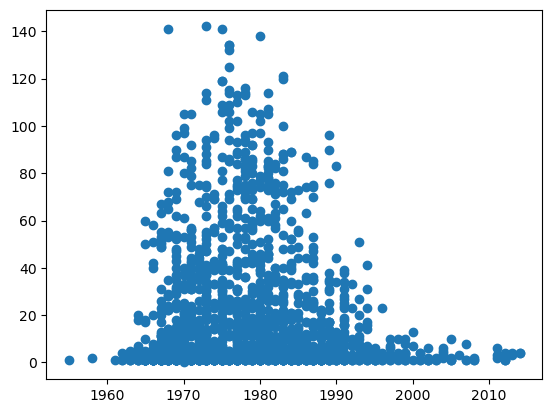

In [78]:
plt.scatter(test.release_year, test.playcount)

## Check Min, Max of Each Column

Is there any illogical value in any column? How can we fix that?

In [79]:
rock.head()

,song_clean,artist_clean,release_year,combined,first,year,playcount,f_g
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,0,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


In [80]:
rock.release_year.value_counts().sort_values()

1961      1
2006      1
1955      1
1071      1
1958      1
2014      2
2013      2
2007      3
2008      3
2003      3
2011      3
2000      3
1962      3
2001      4
2005      5
2004      5
2012      5
1998      6
2002      6
1963      9
1997      9
1996      9
1995     10
1999     13
1992     14
1964     14
1993     19
1990     22
1994     25
1965     28
1988     29
1966     30
1989     32
1991     34
1986     37
1987     39
1985     39
1968     46
1974     48
1972     50
1984     51
1982     54
1976     56
1983     60
1981     61
1967     61
1979     63
1978     64
1980     70
1969     72
1971     75
1970     81
1975     83
1977     83
1973    104
0       578
Name: release_year, dtype: int64

## Write Some Functions

## Write a function that will take a row of a DataFrame and print out the song, artist, and whether or not the release date is < 1970

In [81]:
def check_song(row):
    print('Song: ', row['song_clean'])
    print('Artist: ', row['artist_clean'])
    print('Released before 1970: ', row['release_year'] < 1970)
    print('\n')

In [83]:
rock.iloc[10]

song_clean               Baby, Please Don't Go
artist_clean                             AC/DC
release_year                                 0
combined        Baby, Please Don't Go by AC/DC
first                                        1
year                                         0
playcount                                    1
f_g                                          0
Name: 10, dtype: object

In [84]:
check_song(rock.iloc[10])

Song:  Baby, Please Don't Go
Artist:  AC/DC
Released before 1970:  True




## Write a function that converts cells in a DataFrame to float and otherwise replaces them with np.nan

In [86]:
def convert_to_float(column):
    column = pd.to_numeric(column, errors='coerce')
    return column

In [87]:
rock.apply(convert_to_float)

,song_clean,artist_clean,release_year,combined,first,year,playcount,f_g
0,NaN,NaN,1982,NaN,1,1,82,82
1,NaN,NaN,0,NaN,1,0,3,0
2,NaN,NaN,1981,NaN,1,1,85,85
3,NaN,NaN,1980,NaN,1,1,18,18
4,NaN,NaN,1975,NaN,1,1,1,1
...,...,...,...,...,...,...,...,...
2225,NaN,NaN,0,NaN,1,0,1,0
2226,NaN,NaN,1981,NaN,1,1,32,32
2227,NaN,NaN,1975,NaN,1,1,109,109
2228,NaN,NaN,1983,NaN,1,1,1,1


## Describe the new float-only DataFrame.

In [88]:
rock.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,2230.0,1465.331390,867.196161,0.0,0.0,1973.0,1981.0,2014.0
first,2230.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
year,2230.0,0.741256,0.438043,0.0,0.0,1.0,1.0,1.0
playcount,2230.0,16.872646,25.302972,0.0,1.0,4.0,21.0,142.0
f_g,2230.0,15.048430,25.288366,0.0,0.0,3.0,18.0,142.0


>




---



---



> > > > > > > > > © 2022 Institute of Data


---



---



